# When t-SNE ?

In [1]:
!wget -q https://github.com/PSAM-5020-2025S-A/5020-utils/raw/main/src/data_utils.py

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

from data_utils import PCA, StandardScaler, TSNE, object_from_json_url

### Get Data

In [3]:
PENGUIN_URL = "https://raw.githubusercontent.com/PSAM-5020-2025S-A/5020-utils/refs/heads/main/datasets/json/penguins.json"
penguin_data = object_from_json_url(PENGUIN_URL)

penguins_df = pd.DataFrame.from_records(penguin_data)
penguins_df

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,39.1,18.7,181.0,3750.0,1
1,Adelie,39.5,17.4,186.0,3800.0,0
2,Adelie,40.3,18.0,195.0,3250.0,0
3,Adelie,36.7,19.3,193.0,3450.0,0
4,Adelie,39.3,20.6,190.0,3650.0,1
...,...,...,...,...,...,...
328,Chinstrap,55.8,19.8,207.0,4000.0,1
329,Chinstrap,43.5,18.1,202.0,3400.0,0
330,Chinstrap,49.6,18.2,193.0,3775.0,1
331,Chinstrap,50.8,19.0,210.0,4100.0,1


### Penguin Example

Explore the penguin data.

Let's encode the species column into integers.
It's a simple encoding, so we can just do it manually using a function and the `DataFrame.apply()` command.

In [4]:
species = list(penguins_df["species"].unique())

def species_to_label(s):
  return species.index(s)

penguins_df["label"] = penguins_df["species"].apply(species_to_label)

display(penguins_df)
penguins_df.shape

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,label
0,Adelie,39.1,18.7,181.0,3750.0,1,0
1,Adelie,39.5,17.4,186.0,3800.0,0,0
2,Adelie,40.3,18.0,195.0,3250.0,0,0
3,Adelie,36.7,19.3,193.0,3450.0,0,0
4,Adelie,39.3,20.6,190.0,3650.0,1,0
...,...,...,...,...,...,...,...
328,Chinstrap,55.8,19.8,207.0,4000.0,1,2
329,Chinstrap,43.5,18.1,202.0,3400.0,0,2
330,Chinstrap,49.6,18.2,193.0,3775.0,1,2
331,Chinstrap,50.8,19.0,210.0,4100.0,1,2


(333, 7)

### Scale Features

Choose features to scale and reduce

In [6]:
# TODO: Separate features from the full DataFrame
# TODO: Scale data
scaler = StandardScaler()

penguins_scaled_df = scaler.fit_transform(penguins_df.drop(columns=["species", "label"]))

penguins_scaled_df

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,-0.896042,0.780732,-1.426752,-0.568475,0.991031
1,-0.822788,0.119584,-1.069474,-0.506286,-1.009050
2,-0.676280,0.424729,-0.426373,-1.190361,-1.009050
3,-1.335566,1.085877,-0.569284,-0.941606,-1.009050
4,-0.859415,1.747026,-0.783651,-0.692852,0.991031
...,...,...,...,...,...
328,2.162314,1.340165,0.431094,-0.257532,0.991031
329,-0.090248,0.475587,0.073816,-1.003795,-1.009050
330,1.026876,0.526444,-0.569284,-0.537380,0.991031
331,1.246638,0.933305,0.645461,-0.133155,0.991031


### PCA

We can try to simplify this data by performing `PCA` and combining some of the original features into _principal components_.

In [8]:
# TODO: create PCA with 3 components
pca = PCA(n_components=3)

# TODO: fit+transform
penguins_pca_df = pca.fit_transform(penguins_scaled_df)

# TODO: look at explained variance
pca.explained_variance()

np.float64(0.9456092586241773)

### Plots

In [11]:
def plot_2d_3d(mdf, colors=None):
  column_names = mdf.columns

  # First 2 PCs
  plt.scatter(mdf[column_names[0]], mdf[column_names[1]], c=colors)
  plt.xlabel(column_names[0])
  plt.ylabel(column_names[1])
  plt.title("2 Components")
  plt.show()

  # First 3 PCs
  fig = plt.figure(figsize=(8, 8))
  ax = fig.add_subplot(projection='3d')

  ax.scatter(mdf[column_names[0]],
            mdf[column_names[1]],
            mdf[column_names[2]],
            c=colors)
  ax.set_xlabel(column_names[0])
  ax.set_ylabel(column_names[1])
  ax.set_zlabel(column_names[2])
  ax.set_title("3 Components")
  plt.show()

In [ ]:
plot_2d_3d(penguins_pca_df, colors=penguins_df["label"])

Although it has combined some of the features, we can still see a lot of information from our original data.

### t-SNE

Repeat the above using t-SNE.

We already have scaled features, we just have to `fit_transform()` them it with a t-SNE object.

In [14]:
# TODO: create TSNE with 3 components
tsne = TSNE(n_components=3)

# TODO: fit+transform
penguins_tsne_df = tsne.fit_transform(penguins_scaled_df)

penguins_tsne_df

,TSNE0,TSNE1,TSNE2
0,0.366529,11.681821,-1.958581
1,-8.567122,-3.365991,-0.777377
2,-9.085504,-4.607827,-2.628458
3,-11.505222,-4.287511,-1.409700
4,0.113722,8.220624,-1.915944
...,...,...,...
328,0.166018,3.718547,5.280700
329,-4.112101,-2.477618,-3.076495
330,-2.150049,5.447124,4.382481
331,0.166280,5.426219,5.368085


### Plots

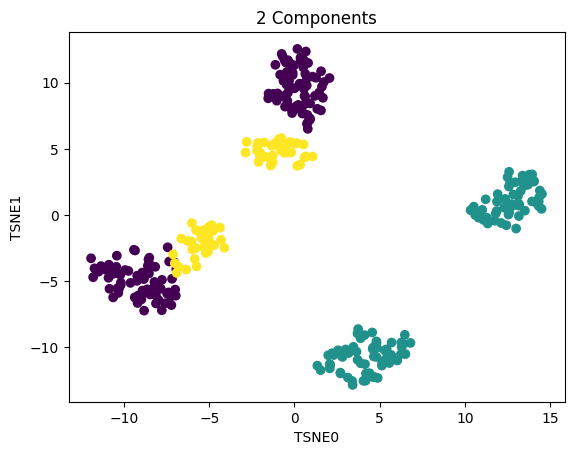

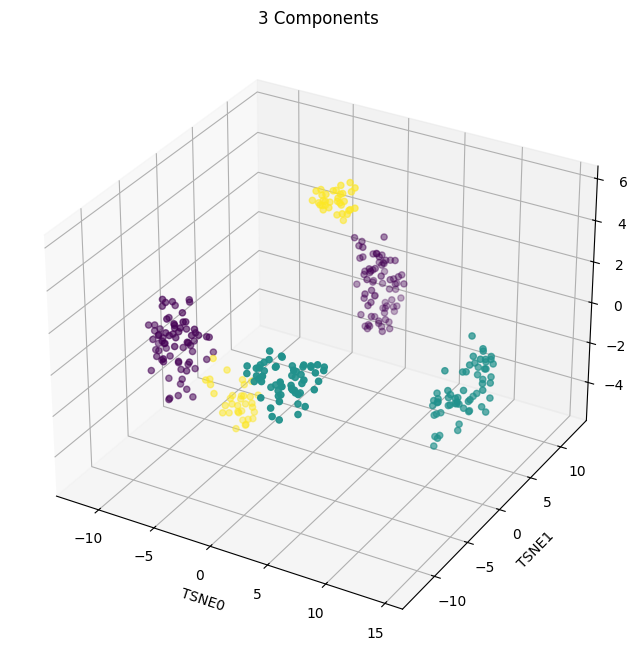

In [16]:
plot_2d_3d(penguins_tsne_df, colors=penguins_df["label"])